### Data Exploration & Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading Apple Inc. stock prices that can be easily downloaded for free from [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL/history?p=AAPL)

In [2]:
def load_csv_with_dates(file):
    return pd.read_csv(file, 
                       index_col=0, 
                       parse_dates=True, 
                       infer_datetime_format=True)

In [3]:
apple_stock = load_csv_with_dates('datasets/AAPL_yahoo-finance_19801212-20190531.csv')

# for the sake of simplicity I'm gonna drop Adj Close column
apple_stock.drop(columns='Adj Close', inplace=True)

In [4]:
apple_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,18362400.0


In [5]:
print('Total data points: {}'.format(len(apple_stock)))
print('From {} to {}'.format(apple_stock.index[0], apple_stock.index[-1]))

Total data points: 9699
From 1980-12-12 00:00:00 to 2019-05-31 00:00:00


In [152]:
Do we have null values?

Object `values` not found.


Do we have null values? and how many?

In [153]:
apple_stock.isnull().any()

Open      True
High      True
Low       True
Close     True
Volume    True
dtype: bool

In [154]:
apple_stock.isnull().sum()

Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [155]:
apple_stock[apple_stock['Close'].isnull()]

,Open,High,Low,Close,Volume
Date,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN


In [156]:
def get_range(start, end, df):
    return df[(df.index >= start) & (df.index <= end)]

In [160]:
get_range('1981-08-07', '1981-08-11', apple_stock)

,Open,High,Low,Close,Volume
Date,,,,,
1981-08-07,0.450893,0.453125,0.450893,0.450893,2301600.0
1981-08-10,NaN,NaN,NaN,NaN,NaN
1981-08-11,0.441964,0.441964,0.437500,0.437500,17864000.0


Let's populate this value with the previous one

In [163]:
apple_stock.loc['1981-08-10'] = apple_stock.loc['1981-08-07']

In [164]:
get_range('1981-08-07', '1981-08-11', apple_stock)

,Open,High,Low,Close,Volume
Date,,,,,
1981-08-07,0.450893,0.453125,0.450893,0.450893,2301600.0
1981-08-10,0.450893,0.453125,0.450893,0.450893,2301600.0
1981-08-11,0.441964,0.441964,0.437500,0.437500,17864000.0


Descriptive Statistics:

In [75]:
apple_stock.describe()

,Open,High,Low,Close,Volume
count,9698.000000,9698.000000,9698.000000,9698.000000,9.698000e+03
mean,27.946123,28.215623,27.662742,27.946056,8.697721e+07
std,49.279331,49.709499,48.845790,49.290084,8.650311e+07
min,0.198661,0.198661,0.196429,0.196429,3.472000e+05
25%,1.057143,1.077924,1.035714,1.058036,3.368798e+07
50%,1.678929,1.719375,1.651786,1.683661,5.881330e+07
75%,27.435714,27.762501,27.097857,27.380714,1.084872e+08
max,230.779999,233.470001,229.779999,232.070007,1.855410e+09


Let's plot the closing prices over time

In [6]:
def plot_field_over_time(df, title, ylabel=None, xlabel='Year', ylegend=None, y='Close', figsize=(15, 4)):
    ax = df.reset_index().plot(x='Date', 
                               y=y, 
                               title=title,
                               figsize=figsize)
    ax.set_xlabel(xlabel)
    
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    
    if ylegend is not None:
        ax.legend([ylegend])

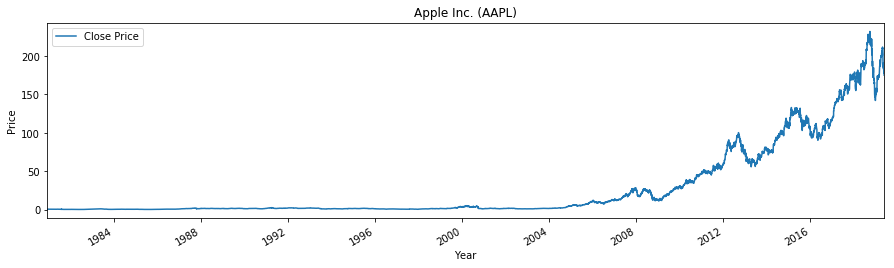

In [7]:
plot_field_over_time(apple_stock, ylabel='Price', ylegend='Close Price', title='Apple Inc. (AAPL)')

The dataset is non-stationary, meaning that the mean and the variance of the observations change over time

How about the volumen?

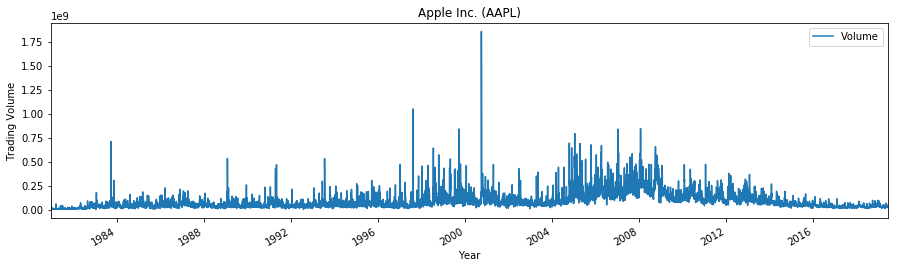

In [8]:
plot_field_over_time(apple_stock, y='Volume', ylabel='Trading Volume', title='Apple Inc. (AAPL)')

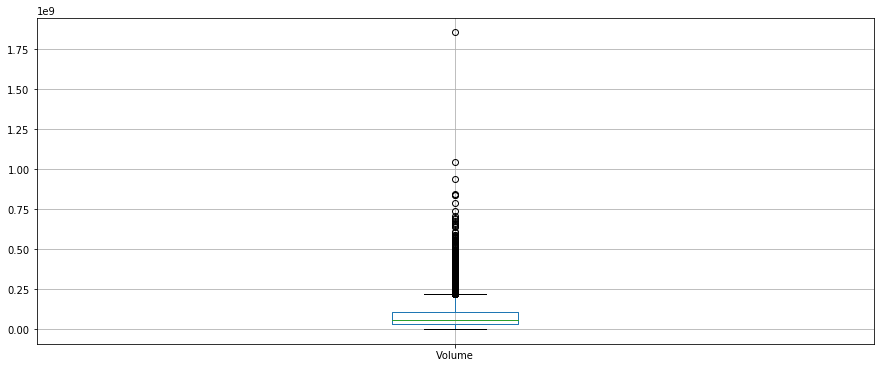

In [94]:
apple_stock[['Volume']].boxplot(figsize=(15, 6))

Distribution of observations, it means values without the temporal ordering:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2baacb00>,
      dtype=object)

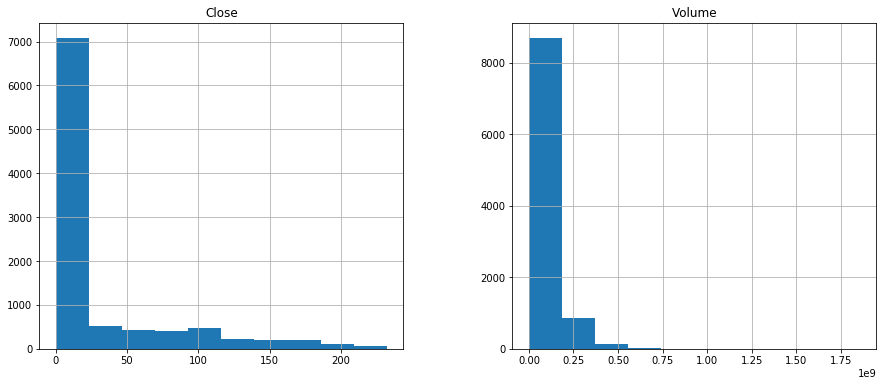

In [85]:
apple_stock[['Close', 'Volume']].hist(figsize=(15, 6))

Let's zoom in and plot 2015, 2016, 2017 and 2018 prices:

In [10]:
apple_stock_2015 = get_range('2015-01-01', '2015-12-31', apple_stock)
apple_stock_2016 = get_range('2016-01-01', '2016-12-31', apple_stock)
apple_stock_2017 = get_range('2017-01-01', '2017-12-31', apple_stock)
apple_stock_2018 = get_range('2018-01-01', '2018-12-31', apple_stock)

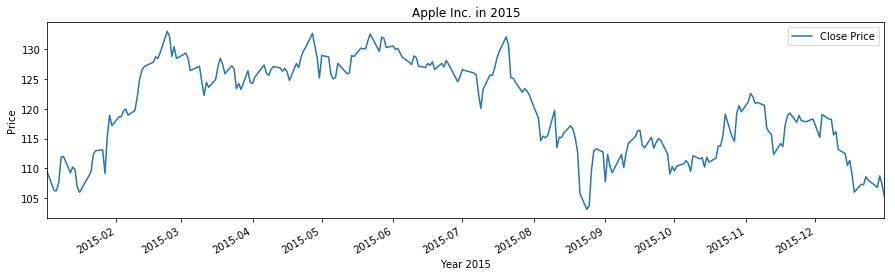

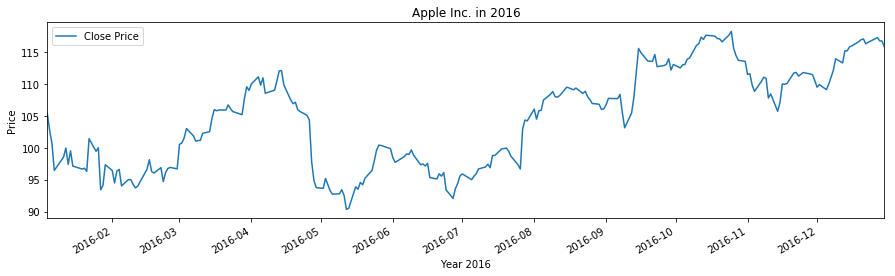

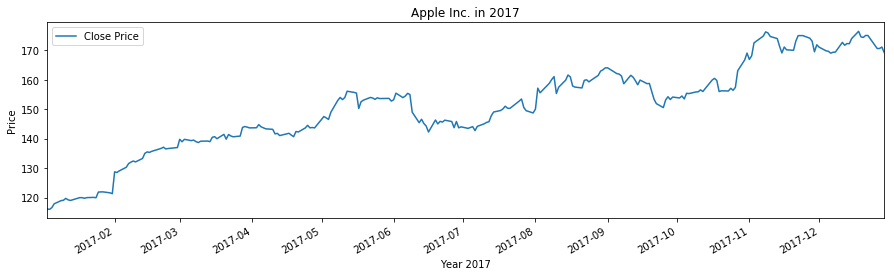

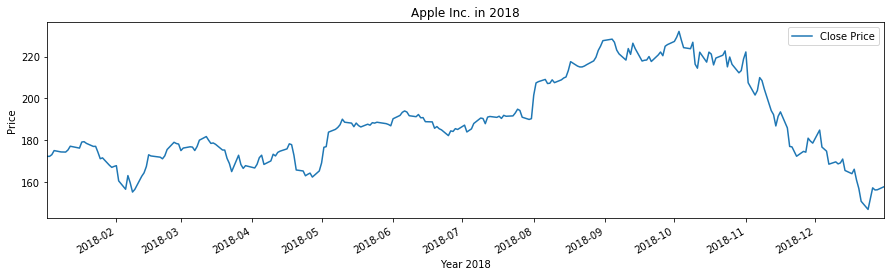

In [11]:
plot_field_over_time(apple_stock_2015, 
                     xlabel='Year 2015', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2015')

plot_field_over_time(apple_stock_2016, 
                     xlabel='Year 2016', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2016')

plot_field_over_time(apple_stock_2017, 
                     xlabel='Year 2017', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2017')

plot_field_over_time(apple_stock_2018, 
                     xlabel='Year 2018', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2018')

A nice visualization would be using candlesticks. We need to import the necessary libs

In [12]:
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

In [13]:
def plot_candlestick(title, xlabel, ylabel, df, figsize=(15, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    candlestick_ohlc(ax, 
                     zip(mdates.date2num(df.index.to_pydatetime()), 
                         df['Open'], 
                         df['High'], 
                         df['Low'], 
                         df['Close']), 
                     width=0.6, 
                     colorup='g')
    ax.xaxis_date()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

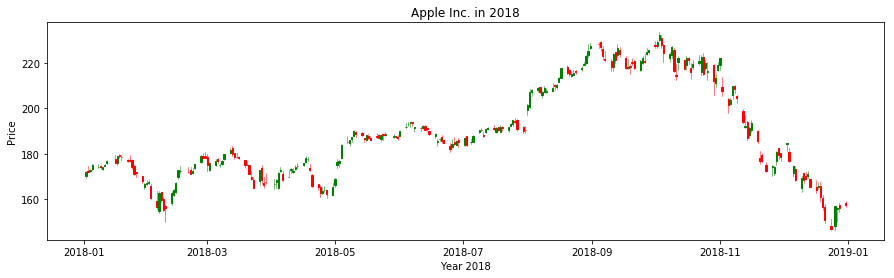

In [14]:
plot_candlestick('Apple Inc. in 2018', 'Year 2018', 'Price', apple_stock_2018)

Let's zoom in a bit more. Oct, Nov and Dec 2018:

In [15]:
apple_stock_201810 = get_range('2018-10-01', '2018-10-31', apple_stock)
apple_stock_201811 = get_range('2018-11-01', '2018-11-30', apple_stock)
apple_stock_201812 = get_range('2018-12-01', '2018-12-31', apple_stock)

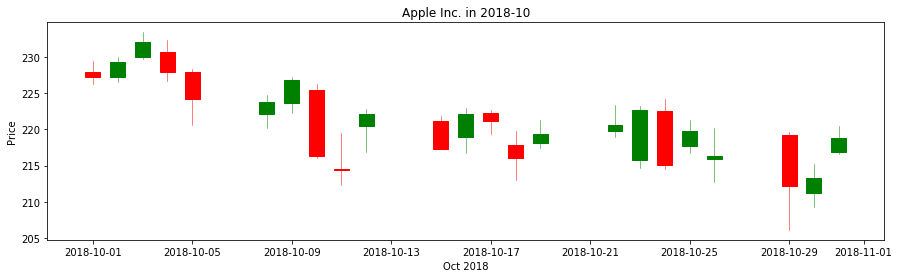

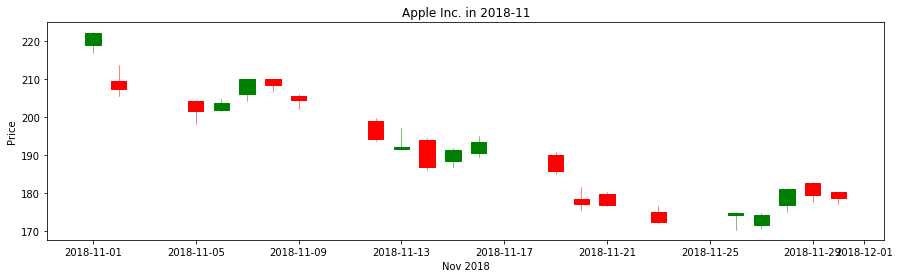

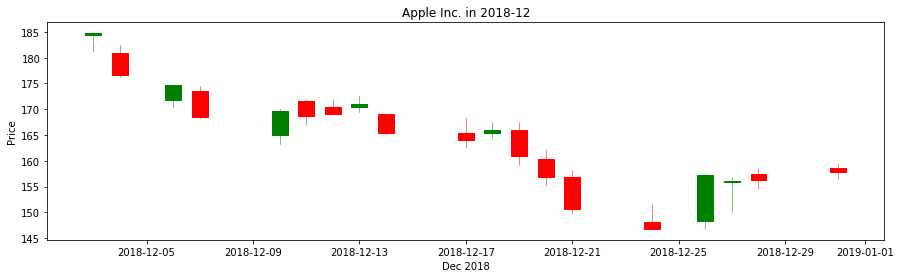

In [16]:
plot_candlestick('Apple Inc. in 2018-10', 'Oct 2018', 'Price', apple_stock_201810)
plot_candlestick('Apple Inc. in 2018-11', 'Nov 2018', 'Price', apple_stock_201811)
plot_candlestick('Apple Inc. in 2018-12', 'Dec 2018', 'Price', apple_stock_201812)

I'd be curious to know what the time series look like after adjusting inflation. We need to first load the [Consumer Price Index for All Urban Consumers: All Items](https://fred.stlouisfed.org/series/CPIAUCSL)

In [17]:
# cpi = load_csv_with_dates('datasets/CPIAUCSL_FRED_19470101-20190401.csv') # Seasonally Adjusted
cpi = load_csv_with_dates('datasets/CPIAUCNS_FRED-19130101-20190401.csv') # Not Seasonally Adjusted

# We need to rename the index to be able to merge later on
cpi.rename_axis('Date', inplace=True)

In [18]:
cpi.head()

,CPIAUCNS
Date,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


In [19]:
print('Consumer Price Index from {} to {}'.format(cpi.index[0], cpi.index[-1]))

Consumer Price Index from 1913-01-01 00:00:00 to 2019-04-01 00:00:00


Let's visualize the inflation:

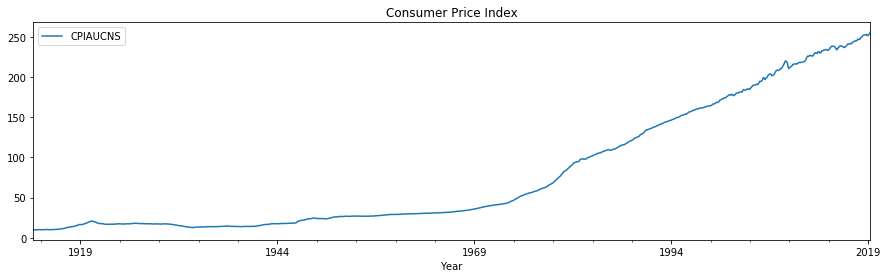

In [20]:
plot_field_over_time(cpi, y='CPIAUCNS', title='Consumer Price Index')

We're gonna add a new column, CPI_multiplier ([reference](https://towardsdatascience.com/adjusting-prices-for-inflation-in-pandas-daaaa782cd89))

In [23]:
cpi_with_mul = cpi.copy()
cpi_with_mul['CPI_Multiplier'] = cpi['CPIAUCNS'].iloc[-1] / cpi['CPIAUCNS']

In [24]:
cpi_with_mul.tail()

,CPIAUCNS,CPI_Multiplier
Date,,
2018-12-01,251.233,1.017175
2019-01-01,251.712,1.015240
2019-02-01,252.776,1.010966
2019-03-01,254.202,1.005295
2019-04-01,255.548,1.000000


In [25]:
apple_stock_with_cpi = pd.merge(apple_stock, cpi_with_mul, left_index=True, right_index=True)

In [26]:
apple_stock_with_cpi['CPI_Adjusted_Price'] = \
    apple_stock_with_cpi['Close'] * apple_stock_with_cpi['CPI_Multiplier'] 

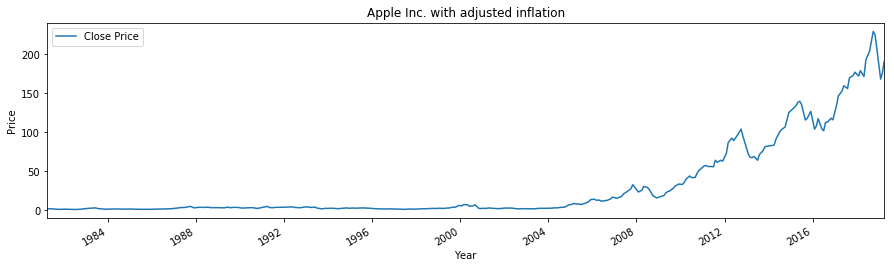

In [27]:
plot_field_over_time(apple_stock_with_cpi, 
                     y='CPI_Adjusted_Price', 
                     ylabel='Price', 
                     ylegend='Close Price',
                     title='Apple Inc. with adjusted inflation')

Let's plot both with and without adjusted inflation to better see the difference:

In [48]:
apple_close_with_cpi = pd.merge(apple_stock['Close'], apple_stock_with_cpi['CPI_Adjusted_Price'], left_index=True, right_index=True)

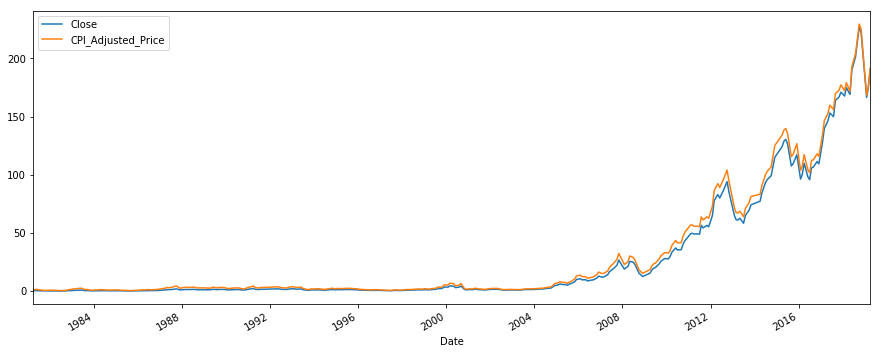

In [72]:
apple_close_with_cpi.plot(figsize=(15, 6))

Lag scatter plots:

In [124]:
from pandas.plotting import lag_plot, autocorrelation_plot

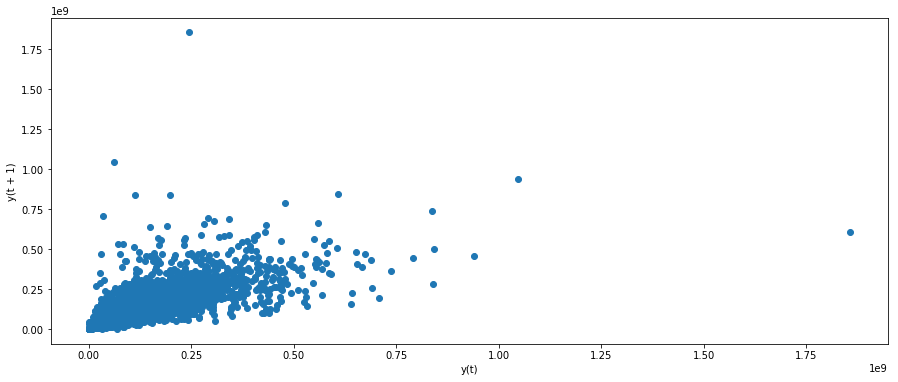

In [126]:
fig, ax = plt.subplots(figsize=(15, 6))
lag_plot(apple_stock, lag=1, ax=ax)

In [129]:
# autocorrelation_plot(apple_stock['Close'])

### Trend and Seasonality

In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [222]:
X = np.array([i for i in range(0, len(apple_stock))]).reshape(-1, 1)
y = np.array(apple_stock['Close']).reshape(-1, 1)

In [223]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [225]:
trend = linear_regressor.predict(X)

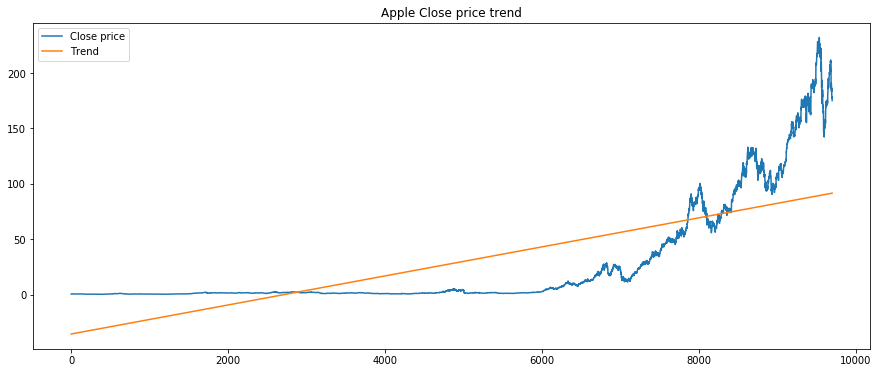

In [242]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(y)
plt.plot(trend)
ax.set_title('Apple Close price trend')
ax.legend(['Close price', 'Trend'])

### Train/Test Split

We're gonna try to predict the whole 2018 year

In [ ]:
apple_train = get_range('1970-01-01', '2017-12-31', apple_stock)
apple_test = get_range('2018-01-01', '2018-12-31', apple_stock)

In [ ]:
apple_train.tail()

In [ ]:
apple_test.head()

In [ ]:
X_train = apple_train.drop('Close', axis=1)
y_train = apple_train['Close']
X_test = apple_test.drop('Close', axis=1)
y_test = apple_test['Close']

In [ ]:
X_train.head()

In [ ]:
y_train.head()

### Technical Indicators

I'm gonna make use of this excellent [library](https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html) for Technical Analysis

In [ ]:
import ta

In [ ]:
def add_technical_indicators(df):
    copy = df.copy()
    
    # Momentum Indicators
    copy['ao'] = ta.momentum.ao(copy['High'], copy['Low'], s=5, len=34, fillna=False)
    copy['mfi_14'] = ta.momentum.money_flow_index(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=14, fillna=False)
    copy['rsi_14'] = ta.momentum.rsi(copy['Close'], n=14, fillna=False)
    copy['so_14'] = ta.momentum.stoch(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['so_sig_14'] = ta.momentum.stoch_signal(copy['High'], copy['Low'], copy['Close'], n=14, d_n=3, fillna=False)
    copy['tsi'] = ta.momentum.tsi(copy['Close'], r=25, s=13, fillna=False)
    copy['uo'] = ta.momentum.uo(copy['High'], copy['Low'], copy['Close'], s=7, m=14, len=28, ws=4.0, wm=2.0, wl=1.0, fillna=False)
    copy['wr'] = ta.momentum.wr(copy['High'], copy['Low'], copy['Close'], lbp=14, fillna=False)
    
    # Volume Indicators
    copy['adi'] = ta.volume.acc_dist_index(copy['High'], copy['Low'], copy['Close'], copy['Volume'], fillna=False)
    copy['cmf'] = ta.volume.chaikin_money_flow(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=20, fillna=False)
    copy['eom_20'] = ta.volume.ease_of_movement(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=20, fillna=False)
    copy['fi2'] = ta.volume.force_index(copy['Close'], copy['Volume'], n=2, fillna=False)
    copy['nvi'] = ta.volume.negative_volume_index(copy['Close'], copy['Volume'], fillna=False)
    copy['obv'] = ta.volume.on_balance_volume(copy['Close'], copy['Volume'], fillna=False)
    copy['vpt'] = ta.volume.volume_price_trend(copy['Close'], copy['Volume'], fillna=False)
    
    # Volatility Indicators
    copy['atr_14'] = ta.volatility.average_true_range(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['b_hband_20'] = ta.volatility.bollinger_hband(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_hband_ind_20'] = ta.volatility.bollinger_hband_indicator(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_lband_20'] = ta.volatility.bollinger_lband(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_lband_ind_20'] = ta.volatility.bollinger_lband_indicator(copy['Close'], n=20, ndev=2, fillna=False)
    copy['mavg_20'] = ta.volatility.bollinger_mavg(copy['Close'], n=20, fillna=False)
    copy['dc_hband_20'] = ta.volatility.donchian_channel_hband(copy['Close'], n=20, fillna=False)
    copy['dc_hband_ind_20'] = ta.volatility.donchian_channel_hband_indicator(copy['Close'], n=20, fillna=False)
    copy['dc_lband_20'] = ta.volatility.donchian_channel_lband(copy['Close'], n=20, fillna=False)
    copy['dc_lband_ind_20'] = ta.volatility.donchian_channel_lband_indicator(copy['Close'], n=20, fillna=False)
    copy['kc10'] = ta.volatility.keltner_channel_central(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_hband_10'] = ta.volatility.keltner_channel_hband(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_hband_ind_10'] = ta.volatility.keltner_channel_hband_indicator(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_lband_10'] = ta.volatility.keltner_channel_lband(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_lband_ind_10'] = ta.volatility.keltner_channel_lband_indicator(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)

    # Trend Indicators
    copy['adx14'] = ta.trend.adx(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
    copy['adx_neg14'] = ta.trend.adx_neg(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
    copy['adx_pos14'] = ta.trend.adx_pos(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
    copy['ai_down25'] = ta.trend.aroon_down(copy['Close'], n=25, fillna=False)
    copy['ai_up25'] = ta.trend.aroon_up(copy['Close'], n=25, fillna=False)
    copy['cci20'] = ta.trend.cci(copy['High'], copy['Low'], copy['Close'], n=20, c=0.015, fillna=False)
    copy['dpo20'] = ta.trend.dpo(copy['Close'], n=20, fillna=False)
    copy['ema12'] = ta.trend.ema_indicator(copy['Close'], n=12, fillna=False)
    copy['ichimoku_a'] = ta.trend.ichimoku_a(copy['High'], copy['Low'], n1=9, n2=26, visual=False, fillna=False)
    copy['ichimoku_b'] = ta.trend.ichimoku_b(copy['High'], copy['Low'], n2=26, n3=52, visual=False, fillna=False)
    copy['kst'] = ta.trend.kst(copy['Close'], r1=10, r2=15, r3=20, r4=30, n1=10, n2=10, n3=10, n4=15, fillna=False)
    copy['kst_sig'] = ta.trend.kst_sig(copy['Close'], r1=10, r2=15, r3=20, r4=30, n1=10, n2=10, n3=10, n4=15, nsig=9, fillna=False)
    copy['macd'] = ta.trend.macd(copy['Close'], n_fast=12, n_slow=26, fillna=False)
    copy['macd_diff'] = ta.trend.macd_diff(copy['Close'], n_fast=12, n_slow=26, n_sign=9, fillna=False)
    copy['macd_sig'] = ta.trend.macd_signal(copy['Close'], n_fast=12, n_slow=26, n_sign=9, fillna=False)
    copy['mi'] = ta.trend.mass_index(copy['High'], copy['Low'], n=9, n2=25, fillna=False)
    copy['trix_15'] = ta.trend.trix(copy['Close'], n=15, fillna=False)
    copy['vi_neg_14'] = ta.trend.vortex_indicator_neg(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['vi_pos_14'] = ta.trend.vortex_indicator_pos(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    
    # Others Indicators
    copy['cr'] = ta.others.cumulative_return(copy['Close'], fillna=False)
    copy['dlr'] = ta.others.daily_log_return(copy['Close'], fillna=False)
    copy['dr'] = ta.others.daily_return(copy['Close'], fillna=False)
    
    return copy.dropna() # we drop all the rows that contain at least one NaN

In [ ]:
apple_stock_TA = add_technical_indicators(apple_stock)

In [ ]:
apple_stock_TA.head()

In [ ]:
apple_stock_TA.describe()

Let's plot all this indicators:

In [ ]:
def plot_columns(columns, df, fromTo=None):
    fig, ax = plt.subplots(figsize=(15, 6))
    
    if fromTo is not None:
        df = get_range(fromTo[0], fromTo[1], df)
        
    for column in columns:
        df.reset_index().plot(ax=ax, x='Date', y=column)

In [ ]:
plot_columns(['Close', 'MA10', 'MA20', 'MA50', 'BBU', 'BBL'], apple_stock_TA, fromTo=('2018-1-1', '2018-12-31'))

In [ ]:
plot_columns(['Close', 'AO', 'ADX', 'MACD'], apple_stock_TA, fromTo=('2017-1-1', '2018-12-31'))

### Other features and assets

Let's add more features. How about adding the CPI?. We need to first add all the missing days in cpi since the frequency of this index is monthly:

In [ ]:
idx_date = pd.date_range(cpi.index[0], cpi.index[-1])
cpi_full = cpi.reindex(idx_date)
cpi_full.fillna(method='ffill', inplace=True)

In [ ]:
cpi_full.head(n=35)

In [ ]:
apple_stock_TA_plus = pd.merge(apple_stock_TA, cpi_full, left_index=True, right_index=True)

In [ ]:
apple_stock_TA_plus.head()

In [ ]:
# https://en.wikipedia.org/wiki/VIX
vix = load_csv_with_dates('datasets/VIX_yahoo-finance_19900102-20190531.csv')

In [ ]:
plot_field_over_time(vix, title='VIX', ylabel='Volatility')

In [ ]:
# https://en.wikipedia.org/wiki/NASDAQ-100
ndx = load_csv_with_dates('datasets/NDX_yahoo-finance_19851001-20190531.csv')

In [ ]:
plot_field_over_time(ndx, title='NASDAQ-100', ylabel='Price', ylegend='Close Price')

In [ ]:
apple_stock_TA_plus2 = pd.merge(apple_stock_TA_plus, 
                                vix['Close'], 
                                left_index=True, 
                                right_index=True, suffixes=('', '_VIX'))

In [ ]:
apple_stock_TA_plus2 = pd.merge(apple_stock_TA_plus2, 
                                ndx['Close'], 
                                left_index=True, 
                                right_index=True, suffixes=('', '_NDX'))

In [ ]:
apple_stock_TA_plus2.head()

### Feature Importance

In [ ]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split

In [ ]:
apple_stock2 = apple_stock_TA_plus2.drop(columns='Adj Close') # We don't need this column

X = apple_stock2.drop(columns='Close')
y = apple_stock2['Close']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.30, random_state=42, shuffle=False)

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 0))
plot_importance(regressor, ax=ax)

How about calculating the importance of the features to predict next day price?

In [ ]:
X_train_1 = X_train[:-1]
y_train_1 = y_train[1:]
X_test_1 = X_test[:-1]
y_test_1 = y_test[1:]

In [ ]:
regressor_1 = XGBRegressor()
regressor_1.fit(X_train_1, y_train_1, eval_set=[(X_test_1, y_test_1)], verbose=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(regressor_1, ax=ax)

next few weeks?

In [ ]:
X_train_15 = X_train[:-15]
y_train_15 = y_train[15:]
X_test_15 = X_test[:-15]
y_test_15 = y_test[15:]

In [ ]:
regressor_15 = XGBRegressor()
regressor_15.fit(X_train_15, y_train_15, eval_set=[(X_test_15, y_test_15)], verbose=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(regressor_15, ax=ax)

next month?

In [ ]:
X_train_21 = X_train[:-21]
y_train_21 = y_train[21:]
X_test_21 = X_test[:-21]
y_test_21 = y_test[21:]

In [ ]:
regressor_21 = XGBRegressor()
regressor_21.fit(X_train_21, y_train_21, eval_set=[(X_test_21, y_test_21)], verbose=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(regressor_21, ax=ax)

next year?

In [ ]:
X_train_252 = X_train[:-252]
y_train_252 = y_train[252:]
X_test_252 = X_test[:-252]
y_test_252 = y_test[252:]

In [ ]:
regressor_252 = XGBRegressor()
regressor_252.fit(X_train_252, y_train_252, eval_set=[(X_test_252, y_test_252)], verbose=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 30))
plot_importance(regressor_252, ax=ax)

Interesting to see how this chart confirms the use of these features to predict future price movements

### Feature Distributions

In [ ]:
import seaborn as sns

features_raw = apple_stock2.drop(columns='Close')

features_raw_corr = features_raw.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(features_raw_corr, cmap='magma', ax=ax)

As we can see, many features are highly correlated. Let's have a look at the distribution:

In [ ]:
ncols=2
nrows=10
column_names = features_raw.columns.values

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
fig.tight_layout()

c = 0
r = 0

for name in column_names:
    sns.distplot(apple_stock2[name], hist=False, ax=axs[r, c])
    
    axs[r, c].get_yaxis().set_ticklabels([])
    
    if (c < ncols - 1):
        c = c + 1
    else:
        c = 0
        r = r + 1

### Feature Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# # Initialize a scaler, then apply it to the features
# scaler = MinMaxScaler() # default=(0, 1)

# features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
# features_log_minmax_transform = scaler.fit_transform(features_log_transformed)

# # Show an example of a record with scaling applied
# features_log_minmax_transform[:5]

In [ ]:
# features_log_minmax_transform_df = pd.DataFrame(features_log_minmax_transform, 
#                                   index=features_log_transformed.index, 
#                                   columns=features_log_transformed.columns)

In [ ]:
# features_log_minmax_transform_df.head()